<a href="https://colab.research.google.com/github/edakilicaslan1/Book_Recommendation_System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('books.csv',error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
#Understanding the dataset

In [4]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [5]:
df.shape

(11123, 12)

In [6]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [9]:
df['authors'].nunique()

6639

In [10]:
df['title'].nunique()

10348

In [11]:
df['language_code'].value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
nor         1
ara         1
msa         1
gla         1
glg         1
nl          1
ale         1
tur         1
wel         1
srp         1
Name: language_code, dtype: int64

In [12]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [57]:
top_10 = df[(df['ratings_count'] > 1000000)]
top_10.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
284,865,The Alchemist,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.86,0061122416,9780061122415,eng,197,1631221,55843,5/1/1993,HarperCollins
294,890,Of Mice and Men,John Steinbeck,3.87,0142000671,9780142000670,eng,103,1755253,25554,1/8/2002,Penguin Books
299,930,Memoirs of a Geisha,Arthur Golden,4.11,0739326228,9780739326220,eng,434,1301083,19296,11/15/2005,Random House Large Print Publishing
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,4/1/2006,Pocket Books
310,968,The Da Vinci Code (Robert Langdon #2),Dan Brown,3.84,0307277674,9780307277671,eng,489,1679706,35877,3/28/2006,Anchor
514,1618,The Curious Incident of the Dog in the Night-Time,Mark Haddon,3.88,1400032717,9781400032716,eng,226,1054308,35537,5/18/2004,Vintage


In [16]:
data = top_10.sort_values(by ='average_rating',ascending = False).head(10)
data

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
5270,19063,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,4.37,0375831002,9780375831003,eng,552,1516367,86881,3/14/2006,Alfred A. Knopf
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
7309,28187,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,4.25,0786838655,9780786838653,eng,375,1766725,47951,3/1/2006,Disney Hyperion Books
6422,24178,Charlotte's Web,E.B. White/Garth Williams/Rosemary Wells,4.17,0064410935,9780064410939,eng,184,1300470,14739,10/1/2001,HarperCollinsPublishers
1069,3636,The Giver (The Giver #1),Lois Lowry,4.13,0385732554,9780385732550,eng,208,1585589,56604,1/24/2006,Ember


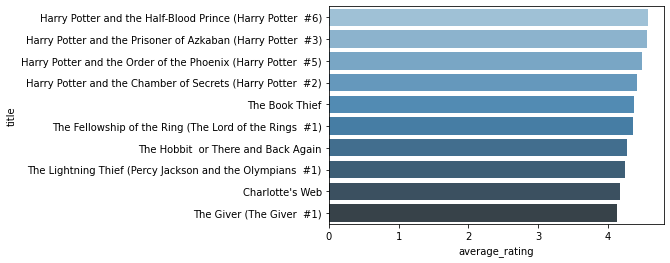

In [17]:
sns.barplot(x = 'average_rating',y = 'title' ,data = data, palette = 'Blues_d');

In [23]:
top_10_authors = df.groupby('authors').count().sort_values('title', ascending=False).head(10)
top_10_authors

,bookID,title,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
authors,,,,,,,,,,,
Stephen King,40,40,40,40,40,40,40,40,40,40,40
P.G. Wodehouse,40,40,40,40,40,40,40,40,40,40,40
Rumiko Takahashi,39,39,39,39,39,39,39,39,39,39,39
Orson Scott Card,35,35,35,35,35,35,35,35,35,35,35
Agatha Christie,33,33,33,33,33,33,33,33,33,33,33
Piers Anthony,30,30,30,30,30,30,30,30,30,30,30
Mercedes Lackey,29,29,29,29,29,29,29,29,29,29,29
Sandra Brown,29,29,29,29,29,29,29,29,29,29,29
Dick Francis,28,28,28,28,28,28,28,28,28,28,28


In [31]:
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
most_rated

,bookID,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
title,,,,,,,,,,,
Twilight (Twilight #1),41865,Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company
The Hobbit or There and Back Again,5907,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
The Catcher in the Rye,5107,J.D. Salinger,3.80,0316769177,9780316769174,eng,277,2457092,43499,1/30/2001,Back Bay Books
Angels & Demons (Robert Langdon #1),960,Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,4/1/2006,Pocket Books
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),5,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
Harry Potter and the Chamber of Secrets (Harry Potter #2),15881,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
Harry Potter and the Order of the Phoenix (Harry Potter #5),2,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
The Fellowship of the Ring (The Lord of the Rings #1),34,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
Animal Farm,7613,George Orwell/Boris Grabnar/Peter Škerl,3.93,0452284244,9780452284241,eng,122,2111750,29677,5/6/2003,NAL


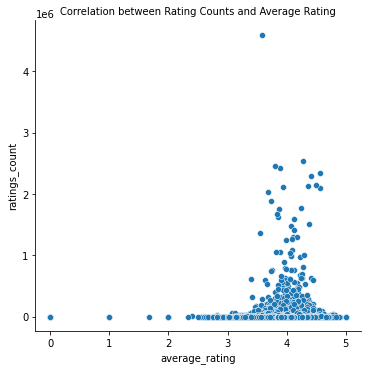

In [41]:
sns.relplot(data = df, x = 'average_rating', y = 'ratings_count', sizes = (200,250));
plt.title("Correlation between Rating Counts and Average Rating",fontsize= 10);

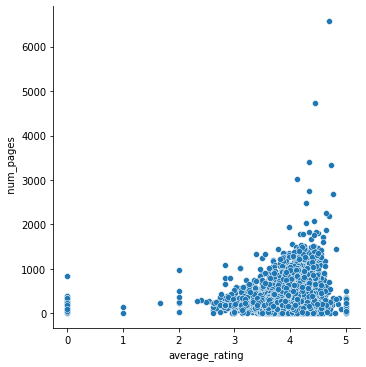

In [43]:
sns.relplot(data =df, x = "average_rating", y = "  num_pages",sizes = (200,250));

In [45]:
df2 = df.copy()

In [46]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [60]:
rating_df = pd.get_dummies(df2['rating_between'])
lang_df = pd.get_dummies(df2['language_code'])

In [61]:
features = pd.concat([rating_df, 
                      lang_df, 
                      df2['average_rating'], 
                      df2['ratings_count']], axis=1)

In [62]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import neighbors
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [63]:
model = neighbors.NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [64]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name
    
BookNames = BookRecommender('The Catcher in the Rye')
BookNames

['The Catcher in the Rye',
 'Angels & Demons (Robert Langdon  #1)',
 'Animal Farm',
 'Lord of the Flies',
 'Romeo and Juliet',
 'Of Mice and Men',
 'The Da Vinci Code (Robert Langdon  #2)',
 'The Alchemist',
 'Eat  Pray  Love',
 'Brave New World']

In [66]:
BookNames_2 = BookRecommender("Animal Farm")
BookNames_2

['Animal Farm',
 'Lord of the Flies',
 'Romeo and Juliet',
 'Angels & Demons (Robert Langdon  #1)',
 'Of Mice and Men',
 'The Catcher in the Rye',
 'The Da Vinci Code (Robert Langdon  #2)',
 'The Alchemist',
 'Eat  Pray  Love',
 'Brave New World']

In [68]:
BookNames_3 = BookRecommender("The Alchemist")
BookNames_3

['The Main',
 'The Alchemist',
 'Scales of the Serpent (Diablo: The Sin War  #2)',
 'The Siren Song (Pirates of the Caribbean: Jack Sparrow  #2)',
 'Hollywood Tough (Shane Scully  #3)',
 'The Sound and the Fury: An Authoritative Text  Backgrounds and Contexts  Criticism',
 'Language and Mind',
 'Sylvia',
 'Saxons  Vikings  and Celts: The Genetic Roots of Britain and Ireland',
 'Fiddlers (87th Precinct  #55)']